In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# Importing the datasets. 
# This analysis will be focused on the current & historic dataset as well as COVID-19 cases data

current = pd.read_csv("NYPD_Complaint_Data_Current__Year_To_Date_.csv")
historic = pd.read_csv("NYPD_Complaint_Data_Historic.csv")
covid = pd.read_csv("COVID_NYC.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Initial data exploration

current.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,885776788,66,NaN,12/23/2020,19:50:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,18-24,BLACK,M,986633,167258,40.625769,-73.991417,"(40.62576896100006, -73.99141682199996)",POINT (-73.99141682199996 40.62576896100006)
1,350637195,77,NaN,12/21/2020,01:10:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1003606,185050,40.674583,-73.930222,"(40.67458330800008, -73.93022154099998)",POINT (-73.93022154099998 40.67458330800008)
2,347843168,43,BRONX,11/22/2020,22:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,F,1020316,239179,40.823101,-73.869690,"(40.82310129900002, -73.86969046099993)",POINT (-73.86969046099993 40.82310129900002)
3,197941396,47,NaN,11/22/2020,09:50:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,F,1026387,262634,40.887451,-73.847608,"(40.88745131300004, -73.84760778699997)",POINT (-73.84760778699997 40.88745131300004)
4,298404927,25,NaN,11/21/2020,15:38:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,18-24,BLACK HISPANIC,M,1003396,230824,40.800222,-73.930848,"(40.80022202900005, -73.93084834199995)",POINT (-73.93084834199995 40.80022202900005)


In [4]:
# Initial data exploration

historic.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,700381962,05/28/2015,15:00:00,NaN,NaN,46.0,06/01/2015,578,HARRASSMENT 2,638.0,...,M,NaN,40.845868,-73.915888,"(40.84586773, -73.915888033)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
1,642234217,10/28/2013,13:50:00,10/28/2013,13:50:00,120.0,10/28/2013,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.627061,-74.077149,"(40.627060894, -74.077149232)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M
2,242465164,05/09/2012,20:50:00,05/09/2012,21:00:00,24.0,05/09/2012,236,DANGEROUS WEAPONS,782.0,...,NaN,NaN,40.800966,-73.969047,"(40.800965968, -73.969047272)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E
3,927207428,01/03/2014,13:30:00,01/03/2014,13:35:00,108.0,01/03/2014,109,GRAND LARCENY,409.0,...,M,NaN,40.745242,-73.894253,"(40.745241809, -73.894253382)",PATROL BORO QUEENS NORTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
4,492142357,04/13/2016,00:00:00,NaN,NaN,40.0,04/13/2016,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,NaN,NaN,40.810352,-73.924942,"(40.810351863, -73.924942326)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E


In [5]:
# Checking for columns that exist in one column but not in the other

print([column for column in historic.columns if column not in current.columns])
print([column for column in current.columns if column not in historic.columns])

[]
['New Georeferenced Column']


In [6]:
# Removing 1 column from "current" and double checked columns

current = current.drop('New Georeferenced Column', axis = 1)
print([column for column in historic.columns if column not in current.columns])
print([column for column in current.columns if column not in historic.columns])

[]
[]


In [7]:
# Concatenating the cuurent & historic dataset, as they don't overlap

complaints = pd.concat([historic, current])

In [8]:
complaints.head(-5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,700381962,05/28/2015,15:00:00,NaN,NaN,46.0,06/01/2015,578,HARRASSMENT 2,638.0,...,M,NaN,40.845868,-73.915888,"(40.84586773, -73.915888033)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
1,642234217,10/28/2013,13:50:00,10/28/2013,13:50:00,120.0,10/28/2013,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.627061,-74.077149,"(40.627060894, -74.077149232)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M
2,242465164,05/09/2012,20:50:00,05/09/2012,21:00:00,24.0,05/09/2012,236,DANGEROUS WEAPONS,782.0,...,NaN,NaN,40.800966,-73.969047,"(40.800965968, -73.969047272)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E
3,927207428,01/03/2014,13:30:00,01/03/2014,13:35:00,108.0,01/03/2014,109,GRAND LARCENY,409.0,...,M,NaN,40.745242,-73.894253,"(40.745241809, -73.894253382)",PATROL BORO QUEENS NORTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
4,492142357,04/13/2016,00:00:00,NaN,NaN,40.0,04/13/2016,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,NaN,NaN,40.810352,-73.924942,"(40.810351863, -73.924942326)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413402,296310647,01/02/2020,18:00:00,01/02/2020,18:10:00,70.0,01/02/2020,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,U,NaN,40.651323,-73.956961,"(40.65132343000005, -73.95696100099997)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
413403,177612365,01/01/2020,00:30:00,01/01/2020,01:00:00,30.0,01/04/2020,106,FELONY ASSAULT,109.0,...,M,NaN,40.825144,-73.951400,"(40.825143625000074, -73.95139982299997)",PATROL BORO MAN NORTH,NaN,25-44,BLACK,M
413404,710352058,12/16/2019,09:00:00,12/17/2019,17:00:00,106.0,01/03/2020,109,GRAND LARCENY,430.0,...,NaN,NaN,40.676570,-73.845620,"(40.67657045900006, -73.84562010099995)",PATROL BORO QUEENS SOUTH,NaN,45-64,WHITE,M
413405,718164907,01/05/2020,11:45:00,01/05/2020,11:57:00,49.0,01/05/2020,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,M,NaN,40.851027,-73.858564,"(40.85102663600002, -73.85856409399997)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F


In [9]:
# Checking data types

complaints.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
PARKS_NM              object
HADEVELOPT            object
HOUSING_PSA           object
X_COORD_CD           float64
Y_COORD_CD           float64
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
STATION_NAME          object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX       

In [10]:
# Converting the date column from object to datetime

complaints['CMPLNT_FR_DT'] = pd.to_datetime(complaints['CMPLNT_FR_DT'],errors='coerce')
complaints['CMPLNT_TO_DT'] = pd.to_datetime(complaints['CMPLNT_TO_DT'],errors='coerce')
complaints['RPT_DT'] = pd.to_datetime(complaints['RPT_DT'],errors='coerce')

In [11]:
# Checking data types again

complaints.dtypes

CMPLNT_NUM                    int64
CMPLNT_FR_DT         datetime64[ns]
CMPLNT_FR_TM                 object
CMPLNT_TO_DT         datetime64[ns]
CMPLNT_TO_TM                 object
ADDR_PCT_CD                 float64
RPT_DT               datetime64[ns]
KY_CD                         int64
OFNS_DESC                    object
PD_CD                       float64
PD_DESC                      object
CRM_ATPT_CPTD_CD             object
LAW_CAT_CD                   object
BORO_NM                      object
LOC_OF_OCCUR_DESC            object
PREM_TYP_DESC                object
JURIS_DESC                   object
JURISDICTION_CODE           float64
PARKS_NM                     object
HADEVELOPT                   object
HOUSING_PSA                  object
X_COORD_CD                  float64
Y_COORD_CD                  float64
SUSP_AGE_GROUP               object
SUSP_RACE                    object
SUSP_SEX                     object
TRANSIT_DISTRICT            float64
Latitude                    

In [12]:
# Reseting the index to make sure it's continuous

complaints.reset_index(inplace=True)
complaints.head(-5)

,index,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,0,700381962,2015-05-28,15:00:00,NaT,NaN,46.0,2015-06-01,578,HARRASSMENT 2,...,M,NaN,40.845868,-73.915888,"(40.84586773, -73.915888033)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
1,1,642234217,2013-10-28,13:50:00,2013-10-28,13:50:00,120.0,2013-10-28,351,CRIMINAL MISCHIEF & RELATED OF,...,NaN,NaN,40.627061,-74.077149,"(40.627060894, -74.077149232)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M
2,2,242465164,2012-05-09,20:50:00,2012-05-09,21:00:00,24.0,2012-05-09,236,DANGEROUS WEAPONS,...,NaN,NaN,40.800966,-73.969047,"(40.800965968, -73.969047272)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E
3,3,927207428,2014-01-03,13:30:00,2014-01-03,13:35:00,108.0,2014-01-03,109,GRAND LARCENY,...,M,NaN,40.745242,-73.894253,"(40.745241809, -73.894253382)",PATROL BORO QUEENS NORTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
4,4,492142357,2016-04-13,00:00:00,NaT,NaN,40.0,2016-04-13,351,CRIMINAL MISCHIEF & RELATED OF,...,NaN,NaN,40.810352,-73.924942,"(40.810351863, -73.924942326)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7396609,413402,296310647,2020-01-02,18:00:00,2020-01-02,18:10:00,70.0,2020-01-02,351,CRIMINAL MISCHIEF & RELATED OF,...,U,NaN,40.651323,-73.956961,"(40.65132343000005, -73.95696100099997)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
7396610,413403,177612365,2020-01-01,00:30:00,2020-01-01,01:00:00,30.0,2020-01-04,106,FELONY ASSAULT,...,M,NaN,40.825144,-73.951400,"(40.825143625000074, -73.95139982299997)",PATROL BORO MAN NORTH,NaN,25-44,BLACK,M
7396611,413404,710352058,2019-12-16,09:00:00,2019-12-17,17:00:00,106.0,2020-01-03,109,GRAND LARCENY,...,NaN,NaN,40.676570,-73.845620,"(40.67657045900006, -73.84562010099995)",PATROL BORO QUEENS SOUTH,NaN,45-64,WHITE,M
7396612,413405,718164907,2020-01-05,11:45:00,2020-01-05,11:57:00,49.0,2020-01-05,351,CRIMINAL MISCHIEF & RELATED OF,...,M,NaN,40.851027,-73.858564,"(40.85102663600002, -73.85856409399997)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F


<AxesSubplot:xlabel='SUSP_SEX', ylabel='count'>

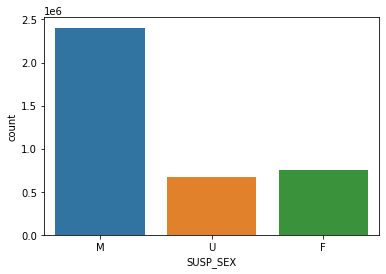

In [13]:
# Some initial exploration of the over crimes by suspect's sex

sns.countplot(data = complaints, x = 'SUSP_SEX')

In [14]:
# Checking the number and percentage of null values for each column

col = {'Null Count' : complaints.isnull().sum(axis = 0), 'Null %': round(complaints.isnull().sum()/len(complaints),2)}
pd.DataFrame(data = col)

,Null Count,Null %
index,0,0.00
CMPLNT_NUM,0,0.00
CMPLNT_FR_DT,819,0.00
CMPLNT_FR_TM,48,0.00
CMPLNT_TO_DT,1707484,0.23
CMPLNT_TO_TM,1702808,0.23
ADDR_PCT_CD,2166,0.00
RPT_DT,0,0.00
KY_CD,0,0.00
OFNS_DESC,18831,0.00


In [15]:
# Taking a look at the null complaint dates, which we will use later on

complaints[complaints['CMPLNT_FR_DT'].isnull()].head(-5)

,index,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
12383,12383,157926465,NaT,08:45:00,2013-10-30,09:00:00,108.0,2013-11-21,578,HARRASSMENT 2,...,M,NaN,40.743811,-73.933765,"(40.7438111, -73.933765081)",PATROL BORO QUEENS NORTH,NaN,<18,ASIAN / PACIFIC ISLANDER,M
20472,20472,687501677,NaT,21:13:00,2014-09-11,21:15:00,26.0,2014-09-11,578,HARRASSMENT 2,...,M,3.0,40.810773,-73.952592,"(40.810772767, -73.95259159)",PATROL BORO MAN NORTH,125 STREET,25-44,UNKNOWN,F
50226,50226,663810445,NaT,20:45:00,2013-03-01,21:00:00,111.0,2013-03-02,361,OFF. AGNST PUB ORD SENSBLTY &,...,M,NaN,40.746721,-73.782416,"(40.746720708, -73.782415705)",PATROL BORO QUEENS NORTH,NaN,65+,ASIAN / PACIFIC ISLANDER,F
62034,62034,632722692,NaT,15:30:00,2016-07-22,11:08:00,79.0,2016-08-03,109,GRAND LARCENY,...,NaN,NaN,40.680399,-73.949558,"(40.680398609, -73.949558393)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,F
85333,85333,689168068,NaT,23:00:00,2015-05-03,11:00:00,20.0,2015-05-03,109,GRAND LARCENY,...,NaN,NaN,40.772273,-73.988116,"(40.772273324, -73.988116123)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982966,6982966,291323814,NaT,01:10:00,2019-04-28,01:59:00,104.0,2019-04-28,107,BURGLARY,...,U,NaN,NaN,NaN,NaN,PATROL BORO QUEENS NORTH,NaN,UNKNOWN,UNKNOWN,D
6988816,5609,111965055,NaT,08:00:00,2020-12-20,10:00:00,47.0,2020-12-22,341,PETIT LARCENY,...,NaN,NaN,40.896294,-73.874810,"(40.89629446500004, -73.87480986399999)",PATROL BORO BRONX,NaN,65+,WHITE,M
7003823,20616,577517798,NaT,11:40:00,2020-12-10,23:00:00,42.0,2020-12-11,341,PETIT LARCENY,...,U,NaN,40.824551,-73.910235,"(40.824550773000055, -73.91023502099996)",PATROL BORO BRONX,NaN,<18,UNKNOWN,F
7010628,27421,938263841,NaT,20:30:00,2020-12-02,09:00:00,44.0,2020-12-02,351,CRIMINAL MISCHIEF & RELATED OF,...,NaN,NaN,40.841978,-73.904158,"(40.84197756200007, -73.90415780199999)",PATROL BORO BRONX,NaN,45-64,BLACK HISPANIC,M


In [16]:
# Filling the null dates from the other date columns, according to priority
# Then double checking the nulls were filled

complaints.fillna(value = {'CMPLNT_FR_DT': complaints['CMPLNT_TO_DT']}, inplace = True)
complaints.fillna(value = {'CMPLNT_FR_DT': complaints['RPT_DT']}, inplace = True)
complaints.isnull().sum(axis = 0)

index                      0
CMPLNT_NUM                 0
CMPLNT_FR_DT               0
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1707484
CMPLNT_TO_TM         1702808
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18831
PD_CD                   6328
PD_DESC                 6328
CRM_ATPT_CPTD_CD           7
LAW_CAT_CD                 0
BORO_NM                11379
LOC_OF_OCCUR_DESC    1546078
PREM_TYP_DESC          40904
JURIS_DESC                 0
JURISDICTION_CODE       6328
PARKS_NM             7368895
HADEVELOPT           7049021
HOUSING_PSA          6828743
X_COORD_CD             24064
Y_COORD_CD             24064
SUSP_AGE_GROUP       4802435
SUSP_RACE            3433894
SUSP_SEX             3567208
TRANSIT_DISTRICT     7232302
Latitude               24064
Longitude              24064
Lat_Lon                24064
PATROL_BORO             6785
STATION_NAME         7232302
VIC_AGE_GROUP        1638445
VIC_RACE      

In [17]:
# Dropping unnecessary columns for the analysis

complaints.drop([column for column in complaints.columns if column not in ['BORO_NM', 'OFNS_DESC', 'CMPLNT_FR_DT', 'LAW_CAT_CD', 'VIC_RACE',
                                                                           'VIC_AGE_GROUP', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'PREM_TYP_DESC', 'SUSP_SEX', 'VIC_SEX']], axis = 1, inplace= True)

In [18]:
complaints.head()

,CMPLNT_FR_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2015-05-28,HARRASSMENT 2,VIOLATION,BRONX,RESIDENCE - APT. HOUSE,25-44,BLACK,M,25-44,WHITE HISPANIC,F
1,2013-10-28,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,STATEN ISLAND,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,45-64,WHITE,M
2,2012-05-09,DANGEROUS WEAPONS,MISDEMEANOR,MANHATTAN,STREET,NaN,NaN,NaN,NaN,UNKNOWN,E
3,2014-01-03,GRAND LARCENY,FELONY,QUEENS,RESIDENCE - APT. HOUSE,NaN,UNKNOWN,M,45-64,ASIAN / PACIFIC ISLANDER,M
4,2016-04-13,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,BRONX,HIGHWAY/PARKWAY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E


In [19]:
# Checking the number of crimes by crime start reported date, while filtering for >100

years = (complaints['CMPLNT_FR_DT'].groupby([complaints.CMPLNT_FR_DT.dt.year]).agg(complaints='count'))
years[years['complaints'] > 100]

,complaints
CMPLNT_FR_DT,
1994,107
1995,118
1996,156
1997,158
1998,285
1999,387
2000,979
2001,1133
2002,1197


In [20]:
# Filtered by cases that started after 2016

complaints = complaints[complaints['CMPLNT_FR_DT'].dt.year > 2016]

In [21]:
# Some more data exploration

complaints.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,CMPLNT_FR_DT,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
count,1810038,1809982,1810038,1808656,1803217,1362511,1362511,1362511,1810033,1810033,1810033
unique,1461,67,3,5,74,69,7,3,92,7,5
top,2017-01-01 00:00:00,PETIT LARCENY,MISDEMEANOR,BROOKLYN,STREET,UNKNOWN,BLACK,M,25-44,UNKNOWN,F
freq,2280,342598,969126,526689,516565,527523,511466,824041,642528,537480,716996
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


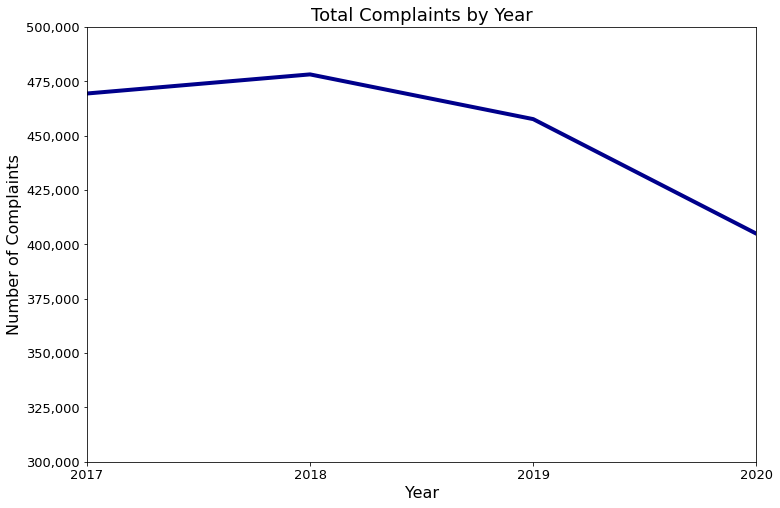

In [22]:
# Plotted total complaints by year

fig, ax1 = plt.subplots(figsize = (12,8))
complaints_time = (complaints['CMPLNT_FR_DT'].groupby(complaints.CMPLNT_FR_DT.dt.year).agg(complaints_count = 'count'))
ax1.plot(complaints_time.index, complaints_time['complaints_count'], linewidth=4, color = 'darkblue')
ax1.set(xlim=[2017,2020], ylim=[300000,500000])
ax1.set_xlabel(xlabel ='Year', fontsize = 16)
ax1.set_ylabel(ylabel = 'Number of Complaints', fontsize = 16)
ax1.set_title(label = 'Total Complaints by Year', fontsize = 18)
ax1.xaxis.set(ticks=range(2017,2021))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('Total_Complaints_by_Year.png')
plt.show()

In [23]:
# Checked for types of offences by A-Z while filtering only offences with over 10 cases
# Created a list of property crimes

offenses = complaints["OFNS_DESC"].value_counts()
print(offenses[offenses > 10].sort_index())
property_ofns = ['ARSON', 'BURGLARY', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY', 'CRIMINAL TRESPASS', 'PETIT LARCENY', 
                 'PETIT LARCENY OF MOTOR VEHICLE', 'POSSESSION OF STOLEN PROPERTY']

ADMINISTRATIVE CODE                       3946
AGRICULTURE & MRKTS LAW-UNCLASSIFIED       490
ALCOHOLIC BEVERAGE CONTROL LAW             434
ANTICIPATORY OFFENSES                       31
ARSON                                     2985
ASSAULT 3 & RELATED OFFENSES            201354
BURGLAR'S TOOLS                           1121
BURGLARY                                 50134
CHILD ABANDONMENT/NON SUPPORT               72
CRIMINAL MISCHIEF & RELATED OF          191663
CRIMINAL TRESPASS                        12068
DANGEROUS DRUGS                          58755
DANGEROUS WEAPONS                        27770
DISORDERLY CONDUCT                         122
ENDAN WELFARE INCOMP                        92
ESCAPE 3                                    31
FELONY ASSAULT                           81686
FELONY SEX CRIMES                           18
FORGERY                                  17458
FRAUDS                                    9093
FRAUDULENT ACCOSTING                       593
GAMBLING     

In [24]:
# Created a new dataframe of property crimes by year, from 2017 to 2020

property_crimes = complaints.OFNS_DESC.groupby([complaints.OFNS_DESC, complaints.CMPLNT_FR_DT.dt.year]).agg('count').unstack()
property_crimes.drop([row for row in property_crimes.index if row not in property_ofns], axis = 0, inplace= True)
property_crimes = property_crimes.astype(int)
property_crimes.loc["Total"] = property_crimes.sum()
property_crimes.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white'})

CMPLNT_FR_DT,2017,2018,2019,2020
OFNS_DESC,,,,
ARSON,704,777,695,809
BURGLARY,12125,11902,10729,15378
CRIMINAL TRESPASS,3601,3303,3041,2123
GRAND LARCENY,43421,46790,42503,33752
GRAND LARCENY OF MOTOR VEHICLE,5680,5554,5415,8974
PETIT LARCENY,83734,89248,88997,80619
PETIT LARCENY OF MOTOR VEHICLE,54,85,85,163
POSSESSION OF STOLEN PROPERTY,1972,1796,1403,1152
ROBBERY,13990,12990,13342,13080


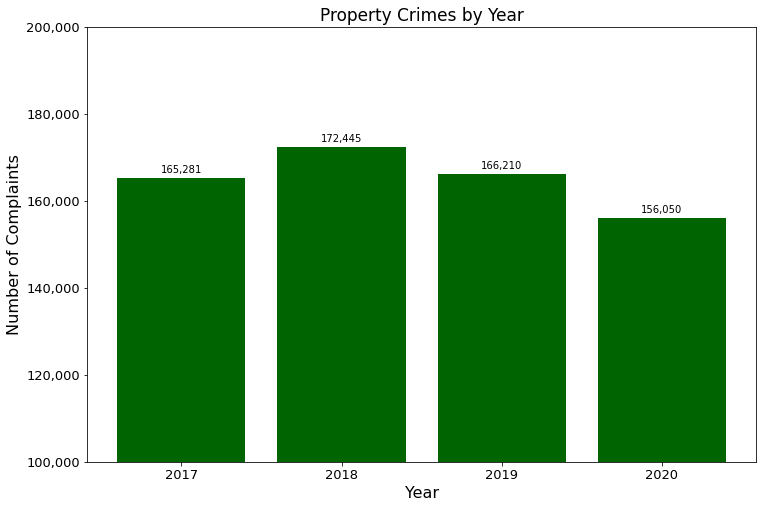

In [25]:
# Plotted the YoY property crimes count

fig, ax1 = plt.subplots(figsize = (12,8))
bar1 = ax1.bar(property_crimes.columns, property_crimes.loc['Total'], linewidth=4, color = 'darkgreen')
ax1.set(ylim=[100000,200000])
ax1.set_xlabel(xlabel ='Year', fontsize = 16)
ax1.set_ylabel(ylabel = 'Number of Complaints', fontsize = 16)
ax1.set_title(label = 'Property Crimes by Year', fontsize = 17)
ax1.xaxis.set(ticks=range(2017,2021))
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
def label(data):
    for i in data:
        height = i.get_height()
        ax1.annotate('{:,.0f}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
label(bar1)
plt.savefig('Property_Crimes_by_Year.png')
plt.show()

In [26]:
# Created a new dataframe of property crimes by year, from 2019 to 2020 with YoY comparison

property_crimes = property_crimes[[2019, 2020]]
property_crimes.drop([row for row in property_crimes.index if row not in property_ofns], axis = 0, inplace= True)
property_crimes = property_crimes.astype(int)
property_crimes.loc["Total"] = property_crimes.sum()
index1 = property_crimes.index
index1.name = "Property Crimes"
property_crimes['YoY Change'] = [(property_crimes.loc[i][2020] - property_crimes.loc[i][2019]) for i in property_crimes.index]
property_crimes['YoY Change (%)'] = [("{0:+.1%}".format((property_crimes.loc[i]['YoY Change'] / property_crimes.loc[i][2019]))) for i in property_crimes.index]
property_crimes.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white'})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


CMPLNT_FR_DT,2019,2020,YoY Change,YoY Change (%)
Property Crimes,,,,
ARSON,695,809,114,+16.4%
BURGLARY,10729,15378,4649,+43.3%
CRIMINAL TRESPASS,3041,2123,-918,-30.2%
GRAND LARCENY,42503,33752,-8751,-20.6%
GRAND LARCENY OF MOTOR VEHICLE,5415,8974,3559,+65.7%
PETIT LARCENY,88997,80619,-8378,-9.4%
PETIT LARCENY OF MOTOR VEHICLE,85,163,78,+91.8%
POSSESSION OF STOLEN PROPERTY,1403,1152,-251,-17.9%
ROBBERY,13342,13080,-262,-2.0%


In [27]:
# Checked for offences that increased or decreased by over 5%

increased = [comp for comp in property_crimes.index[:-1] if (property_crimes.loc[comp].loc[2019] - property_crimes.loc[comp].loc[2020]) < (-property_crimes.loc[comp].loc[2019]*0.05)]
decreased = [comp for comp in property_crimes.index[:-1] if (property_crimes.loc[comp].loc[2019] - property_crimes.loc[comp].loc[2020]) > (property_crimes.loc[comp].loc[2019]*0.05)]
print(f'Increased: {increased} \nDecreased: {decreased}')

Increased: ['ARSON', 'BURGLARY', 'GRAND LARCENY OF MOTOR VEHICLE', 'PETIT LARCENY OF MOTOR VEHICLE'] 
Decreased: ['CRIMINAL TRESPASS', 'GRAND LARCENY', 'PETIT LARCENY', 'POSSESSION OF STOLEN PROPERTY']


In [28]:
# Created dataframes for 2019 and 2020 only, to compare the 2 years

complaints_2019 = complaints[complaints['CMPLNT_FR_DT'].dt.year == 2019]
complaints_2020 = complaints[complaints['CMPLNT_FR_DT'].dt.year == 2020]

In [29]:
# Grouped 2019 by month and offence type

property_2019 = complaints_2019.OFNS_DESC.groupby([complaints_2019.OFNS_DESC, complaints_2019.CMPLNT_FR_DT.dt.month]).agg('count').unstack()
property_2019.drop([row for row in property_2019.index if row not in property_ofns], axis = 0, inplace= True)
property_2019 = property_2019.astype(int)
property_2019.loc["Total"] = property_2019.sum()
print(property_2019)

CMPLNT_FR_DT                       1      2      3      4      5      6   \
OFNS_DESC                                                                  
ARSON                              50     49     54     51     47     62   
BURGLARY                          901    759    757    806    857    825   
CRIMINAL TRESPASS                 322    226    292    257    294    243   
GRAND LARCENY                    3226   2793   3142   3172   3563   3727   
GRAND LARCENY OF MOTOR VEHICLE    334    295    301    348    388    470   
PETIT LARCENY                    6629   5883   6526   6803   7307   7571   
PETIT LARCENY OF MOTOR VEHICLE      2      4      2      9      8     11   
POSSESSION OF STOLEN PROPERTY     111    119    112    117    116    119   
ROBBERY                           939    892    893    910   1088   1149   
Total                           12514  11020  12079  12473  13668  14177   

CMPLNT_FR_DT                       7      8      9      10     11     12  
OFNS_DESC   

In [30]:
# Grouped 2020 by month and offence type

property_2020 = complaints_2020.OFNS_DESC.groupby([complaints_2020.OFNS_DESC, complaints_2020.CMPLNT_FR_DT.dt.month]).agg('count').unstack()
property_2020.drop([row for row in property_2020.index if row not in property_ofns], axis = 0, inplace= True)
property_2020 = property_2020.fillna(0)
property_2020 = property_2020.astype(int)
property_2020.loc["Total"] = property_2020.sum()
print(property_2020)

CMPLNT_FR_DT                       1      2      3     4      5      6   \
OFNS_DESC                                                                 
ARSON                              68     50     63    63     75    118   
BURGLARY                         1171   1007   1069  1172   1208   1767   
CRIMINAL TRESPASS                 237    217    178   185    224    127   
GRAND LARCENY                    3638   3309   2623  1736   2099   2340   
GRAND LARCENY OF MOTOR VEHICLE    570    485    516   563    680    670   
PETIT LARCENY                    7698   7066   6345  4884   6096   5890   
PETIT LARCENY OF MOTOR VEHICLE      0      1      6    18     11     11   
POSSESSION OF STOLEN PROPERTY     103    105     94    97    120    133   
ROBBERY                          1306   1202    947   692    810    977   
Total                           14791  13442  11841  9410  11323  12033   

CMPLNT_FR_DT                       7      8      9      10     11     12  
OFNS_DESC               

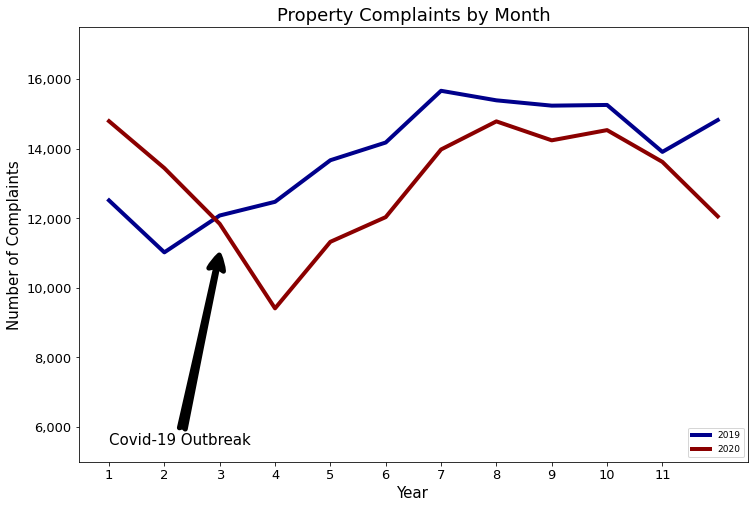

In [31]:
# Plotted complaints by month for 2019 and 2020

fig, ax1 = plt.subplots(figsize = (12,8))
ax1.plot(property_2019.columns, property_2019.loc['Total'], linewidth=4, color = 'darkblue', label = 2019)
ax1.plot(property_2020.columns, property_2020.loc['Total'], linewidth=4, color = 'darkred', label = 2020)
ax1.set_xlabel(xlabel ='Year', fontsize = 15)
ax1.set_ylabel(ylabel = 'Number of Complaints', fontsize = 15)
ax1.set_title(label = 'Property Complaints by Month', fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.xaxis.set(ticks=range(1,12))
ax1.set(ylim=[5000,17500])
ax1.legend(loc='lower right', prop={'size': 9})
ax1.annotate('Covid-19 Outbreak', xy=(3, 11000),
             xycoords='data',  fontsize = 15,
             xytext=(1, 5500),
             textcoords='data',
             arrowprops=dict(arrowstyle= ("Fancy, head_length=1, head_width=1 , tail_width=.4"),
                             color='black',
                             lw=5, 
                               )
           )
plt.savefig('Property_Complaints_by_Month_2019_2020.png')
plt.show()

In [32]:
# Initial exploration of the Covid-19 cases dataset

covid.head(-5)

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,DEATH_COUNT_PROBABLE,CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_CASE_COUNT_7DAY_AVG,QN_HOSPITALIZED_COUNT_7DAY_AVG,QN_DEATH_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,11/24/2020,1980,116,17,3,1690,113,11,346,16,...,427,32,3,229,15,3,207,18,2,0
270,11/25/2020,2250,109,12,1,1770,114,11,405,23,...,452,32,2,280,18,4,219,18,2,0
271,11/26/2020,736,138,7,1,1617,118,11,125,26,...,414,34,2,86,20,2,204,18,2,0
272,11/27/2020,2162,137,12,2,1676,120,11,350,25,...,439,34,2,262,23,4,210,19,3,6000


In [33]:
# Dropped the unnessesary columns of breakdown by borough

covid.drop([column for column in covid.columns if column not in ['DATE_OF_INTEREST', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'DEATH_COUNT_PROBABLE']], axis = 1, inplace= True)

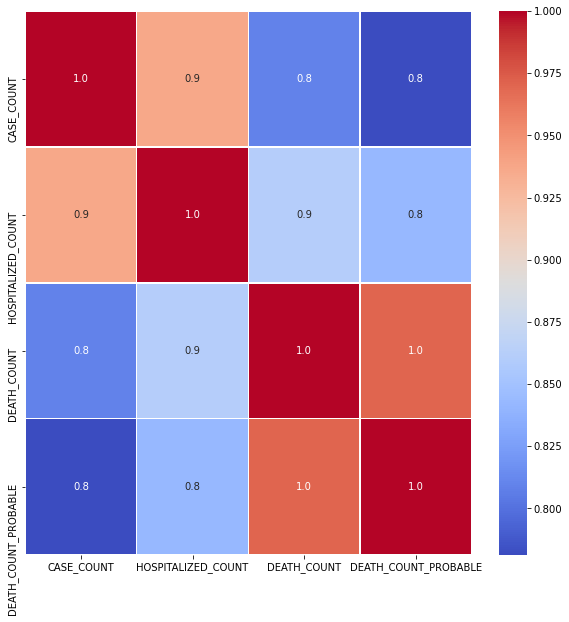

In [34]:
# Checking for correlations between the remaining columns, in order to focus on one of them

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(covid.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = 'coolwarm')
plt.savefig('Covid_Corr.png')
plt.show()

In [35]:
# Dropped all columns besides for date and count of cases, due to high correlation between all data columns

covid.drop([column for column in covid.columns if column not in ['DATE_OF_INTEREST', 'CASE_COUNT']], axis = 1, inplace= True)

In [36]:
# Checked for min and max date values

print(covid['DATE_OF_INTEREST'].min(), covid['DATE_OF_INTEREST'].max())

02/29/2020 12/03/2020


In [37]:
covid.dtypes

DATE_OF_INTEREST    object
CASE_COUNT           int64
dtype: object

In [38]:
# Converted the date from object to DateTime

covid['DATE_OF_INTEREST'] = pd.to_datetime(covid['DATE_OF_INTEREST'],errors='coerce')

In [39]:
covid.dtypes

DATE_OF_INTEREST    datetime64[ns]
CASE_COUNT                   int64
dtype: object

In [40]:
# Check for null values- there are none

col = {'Null Count' : covid.isnull().sum(axis = 0), 'Null %': round(covid.isnull().sum()/len(covid),2)}
pd.DataFrame(data = col)

,Null Count,Null %
DATE_OF_INTEREST,0,0.0
CASE_COUNT,0,0.0


In [41]:
# Grouped the number of cases by month

covid_sum = covid.CASE_COUNT.groupby([covid.DATE_OF_INTEREST.dt.month]).agg('sum')
covid_sum = pd.DataFrame(covid_sum).T
print(covid_sum)

DATE_OF_INTEREST  2      3       4      5      6     7     8      9      10  \
CASE_COUNT         1  65191  109314  28459  10883  9834  7478  10366  16848   

DATE_OF_INTEREST     11    12  
CASE_COUNT        43016  5878  


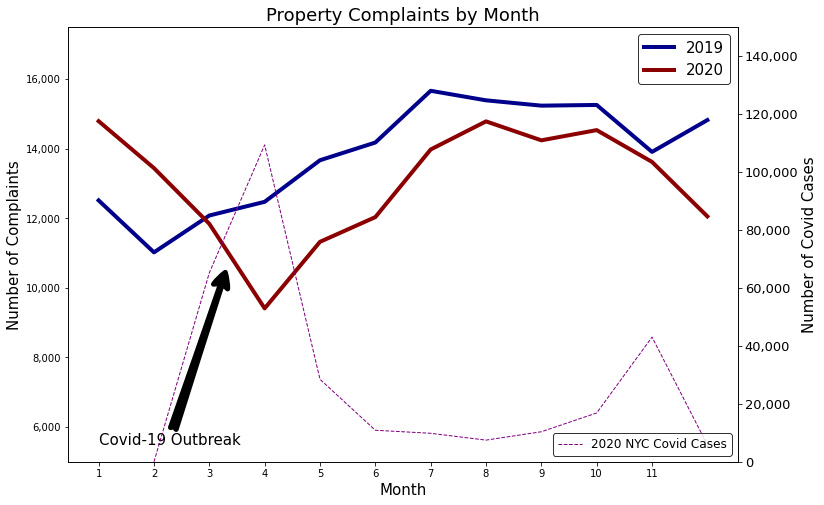

In [42]:
# # Plotted complaints by month for 2019 and 2020, along with the number of Covid-19 cases reported

fig, ax1 = plt.subplots(figsize = (12,8))
ax1.plot(property_2019.columns, property_2019.loc['Total'], linewidth=4, color = 'darkblue', label = 2019)
ax1.plot(property_2020.columns, property_2020.loc['Total'], linewidth=4, color = 'darkred', label = 2020)
ax2 = ax1.twinx()
ax2.plot(covid_sum.columns, covid_sum.loc['CASE_COUNT'], linewidth=1, linestyle='--', color = 'purple', label = '2020 NYC Covid Cases')
ax1.set_xlabel(xlabel ='Month', fontsize = 15)
ax1.set_ylabel(ylabel = 'Number of Complaints', fontsize = 15)
ax1.set_title(label = 'Property Complaints by Month', fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.xaxis.set(ticks=range(1,12))
ax1.set(ylim=[5000,17500])
ax1.legend(loc='upper right', prop={'size': 15}, edgecolor = 'black')
ax2.legend(loc='lower right', prop={'size': 12}, edgecolor = 'black')
ax1.annotate('Covid-19 Outbreak', xy=(3.3, 10500),
             xycoords='data',  fontsize = 15,
             xytext=(1, 5500),
             textcoords='data',
             arrowprops=dict(arrowstyle= ("Fancy, head_length=1, head_width=1 , tail_width=.4"),
                             color='black',
                             lw=5, 
                               )
           )

ax2.set_ylabel('Number of Covid Cases', fontsize = 15)
ax2.set(ylim=[0, 150000])
plt.savefig('Property_Complaints_by_Month_2019_2020_With_Covid.png')
plt.show()